Your goal in this task is to implement aLogistic Regression Classifier.


In [3]:
%pylab inline
import scipy.stats
import numpy as np
from collections import defaultdict  # default dictionary 

Populating the interactive namespace from numpy and matplotlib


In [4]:
#Cutomize the Matplotlib for beautiful plots...
#comment it if it does not work for you.
import dmStyle
dmStyle.customize_mpl()


Setting custom matplotlib visual style


In [5]:
import pandas as pd
import tools as t # set of tools for plotting, data splitting, etc..

###Logistic Regression
Given a set of $m$ $d$-dimensional labelled training examples $X$ and their labels $Y $($Y \in \{0, +1\})$.
Your goal in this assignment is to implement Logistic Regression classifier. Recall that a Logistic Regression uses the hypothesis $\begin{equation} h_\theta(x) = \frac{1}{1+\exp(-x^T\theta)}. \end{equation}$ . 

In Logistic Regression we try to optimize (minimize) following cost function (without regularization) to find the optimal (a separator that separates maximially both the classes) separating decision boundary (plane or hyperplane):


$$J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\lbrack-y^{(i)}log(h_\theta(x^{(i)})) - (1-y^{(i)})log(1-h_\theta(x^{(i)}))\rbrack)+ \lambda \frac{1}{2}\sum_{i=1}^k \theta_k^2$$

The gradient of this cost functions is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0,1,...,k$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}+\lambda \theta_j$$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$


We will be adding an extra column to our X input matrix for the offset, then we can write our hypothesis in the form of matrix-vector product. I.e. earlier we were writing our hypothesis as: $h_\theta(x^i)=\theta_0+ x^i *\theta_1$, [*Remember the notation we are using, superscript is being used to represent the example, and subscript is being used for representing the feature, so $x^i_j$ means j-th feature of i-th example in our set*]

Since we can write this expression in the form of dot product, i.e.  $h_\theta(x^i)=x^{(i)T}\theta$

So to simplify the calculations we will append an extra 1 at the start of each example to perform these computations using matrix-vector product.
 




In [5]:
def GradientDescent(X,Y,cost_function,derivative_cost_function,maxiter=20000, alpha=0.01, plotcf=True):
   
    eps=0.00001
    nexamples=float(X.shape[0])
    thetas=rand(X.shape[1],1)
    
    converged = False
    numiter =0
    CF = cost_function(X,Y,thetas)
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad =derivative_cost_function(X,Y,thetas)

        for k in range(len(thetas)):
            thetas[k]=thetas[k] - alpha * grad[k]

        # mean squared error
        e = cost_function(X,Y,thetas) 
        
        if abs(CF-e) <= eps:
            print 'Converged, iterations: ', numiter, '!!!'
            converged = True
        
        CF = e   # update error 
        numiter += 1  # update iter
    
        if numiter == maxiter:
            print 'Max interactions exceeded!'
            converged = True
    print 'Value of Cost Function (obtained in {} iterations) at Minimum Points {}, is {}'.format(numiter,thetas,CF)
    return thetas
    print 'Value of Cost Function at Minimum Points {}, is {}'.format(theta_new,cf[-1])
    return theta_new

In [23]:
class LogisticRegression:
    
    def __init__(self,lembda=5,alpha=0.001,maxniter=20000, scalefeatures=False):     
        """
            lembda= Regularization parameter...
            scalefeatures (boolean)= scale the features
        """
        self.theta=[] # learned set of parameters
        self.scalefeatures=scalefeatures
        self.lembda=lembda
        self.alpha=alpha
        self.maxniter=maxniter
    def hypothesis(self, X,theta):
 
        h=1/(1+np.exp(-np.dot(X.T,theta)))
        return h
    def cost_function(self, X,Y, theta):
    
        m=X.shape[0]
        cost =  ((1.0/m) * sum([(-Y[i]*(np.log(self.hypothesis(X[i,:],theta))) - ((1-Y[i])*(np.log(1-self.hypothesis(X[i,:],theta))))) for i in range(m)])) + ((1.0/2.0)*(self.lembda*(np.sum(theta**2))))
        return cost

    def derivative_cost_function(self,X,Y,theta):

        nexamples=float(X.shape[0])
        m=X.shape[0]
        partialDerivatives=[]
        for j in range(len(theta)):
            derivative=(1.0/(m)) * sum([(self.hypothesis(X[i,:],theta)-Y[i])*X[i][j] for i in range(m)])
            if j==theta.shape[0]-1:
                partialDerivatives.append(np.asarray(derivative))
            else:
                partialDerivatives.append(derivative+self.lembda*theta[j])
        return np.asarray(partialDerivatives)

    def train(self, X, Y):

        nexamples,nfeatures=X.shape
        ## now go and train a model for each class...
        if self.scalefeatures:
            X=self.scale_features(X)
        maxiter=20000
        alpha=0.01
        self.theta=GradientDescent(X,Y,self.cost_function,self.derivative_cost_function,maxiter,alpha,True)
        
        
    
    def predict(self, X):

        num_test = X.shape[0]
        pclasses=[]
        h=[]
        for i in range(num_test):
            h.append(self.hypothesis(X[i,:],self.theta))
        for j in range(len(h)):
            if (h[j]>0.5):
                pclasses.append(1)
            else:
                pclasses.append(0)
        return pclasses

        return pclass
    
    
    def scale_features(self,X):

        self.xmin= np.min(X,axis=0)
        self.xmax= np.max(X,axis=0)

        return (X-self.xmin)/(self.xmax-self.xmin)


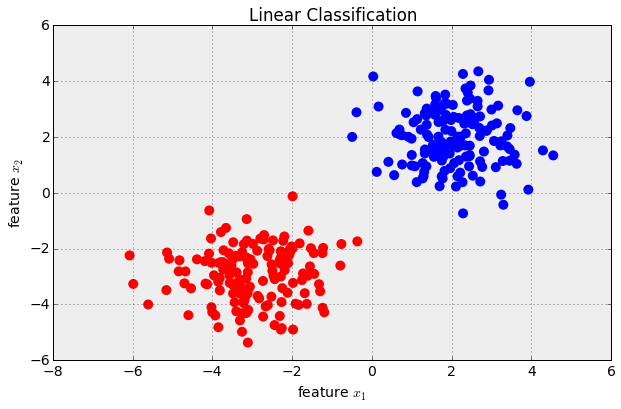

In [24]:
# Create some dummy data for testing

np.random.seed(seed=99)

# make some data up
mean1 = [-3,-3]
mean2 = [2,2]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
nexamples=300
x1 = np.random.multivariate_normal(mean1,cov,nexamples/2)
x2 = np.random.multivariate_normal(mean2,cov,nexamples/2)

X=np.vstack((x1,x2))
Y=np.vstack((1*np.ones((nexamples/2,1)),np.zeros((nexamples/2,1))))

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)



plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm.svg',format='svg')

In [25]:
print X.shape,Y.shape

(300L, 2L) (300L, 1L)


In [26]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [27]:
print X.shape,Y.shape

(300L, 3L) (300L, 1L)


In [28]:
#
def test_derivative(X,Y,cost_function,derivative_cost_function):

    thetas=np.random.rand(X.shape[1],1)
    ad=derivative_cost_function(X,Y,thetas)
    print ad
    eps=0.0001
    cd=[]

    for i in range(len(thetas)):
        ttpe=thetas.copy()
        ttpe[i]=ttpe[i]+eps # add an epsilon for the current theta
        ttme=thetas.copy()
        ttme[i]=ttme[i]-eps # add an epsilon for the current theta
        print 'diff in direction', ttpe-ttme    
        cd.append((cost_function(X,Y,ttpe)-cost_function(X,Y,ttme))/(2*eps))

    print 'Computational derivatvie =',cd
    print 'Analytical derivative =', ad.shape,ad.T
    print 'Their difference=',np.reshape(cd,ad.shape)-ad

In [29]:
#%pdb
lrclass=LogisticRegression(12.5,0.005,2000,False)

In [30]:
test_derivative(X,Y,lrclass.cost_function,lrclass.derivative_cost_function) # derivative must be order of e-8  to e-11

[array([ 10.23571676]) array([ 10.48474014]) array(0.0171800647278612)]
diff in direction [[ 0.0002]
 [ 0.    ]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.0002]
 [ 0.    ]]
diff in direction [[ 0.    ]
 [ 0.    ]
 [ 0.0002]]
Computational derivatvie = [10.235716763693503, 10.484740140537241, 11.355547312961178]
Analytical derivative = (3L,) [array([ 10.23571676]) array([ 10.48474014]) array(0.0171800647278612)]
Their difference= [array([ -1.21611521e-09]) array([ -1.13718457e-09]) 11.338367248233316]


In [22]:
lrclass.train(X,Y) 

Converged, iterations:  878 !!!
Value of Cost Function (obtained in 879 iterations) at Minimum Points [[-0.07926215]
 [-0.07711279]
 [ 0.0028073 ]], is 0.596293805873


Value of Cost Function at Minimum Points [[-0.07920372]
 [-0.07704961]
 [ 0.01205007]], is 0.596423273319


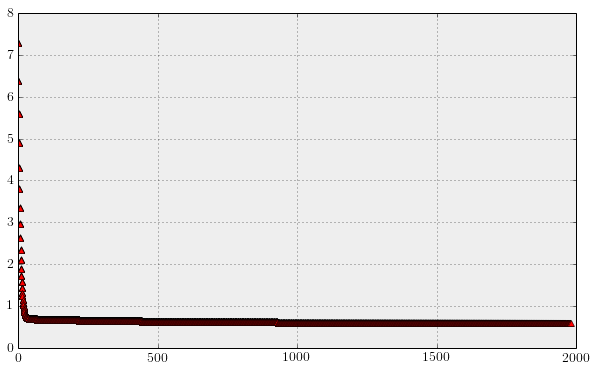

In [13]:
lrclass.train(X,Y) # 

[ 6.28343874] [-4.64101777]


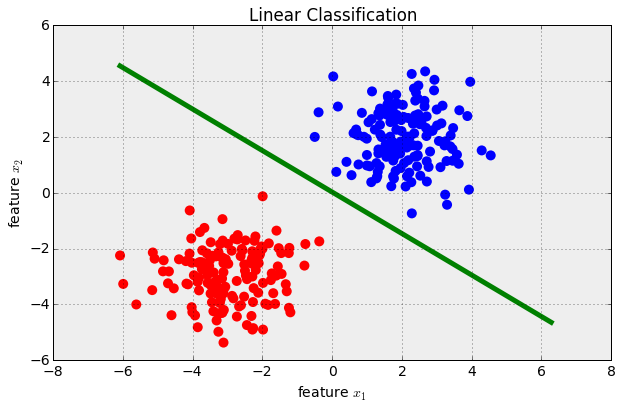

In [90]:
#Lets plot the decision boundary...
plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-lrclass.theta[2]-lrclass.theta[0]*minx)/lrclass.theta[1]
y2=(-lrclass.theta[2]-lrclass.theta[0]*maxx)/lrclass.theta[1]
print y1, y2
plt.plot([minx,y1],[maxx,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')

(10000L, 3L)
[0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,

(-5.3678375947281065, 4.3540144301612509)

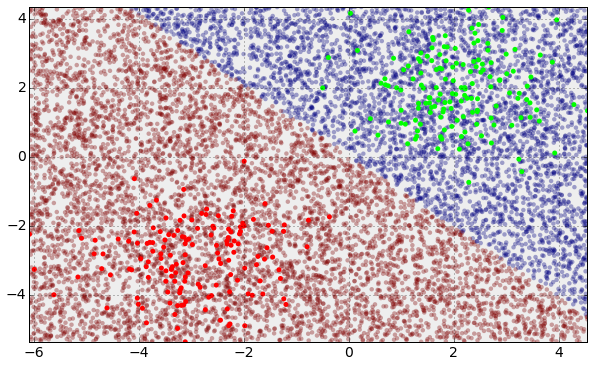

In [91]:
npts=10000
model=lrclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
print cs, np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],c=cs, alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
             c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
             linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

In [6]:
#load the data set
data=pd.read_csv('./iris.data')
data.columns=['SepalLength','SepalWidth','PetalLength','PetalWidth','Class']
print data.describe()

       SepalLength  SepalWidth  PetalLength  PetalWidth
count   149.000000  149.000000   149.000000  149.000000
mean      5.848322    3.051007     3.774497    1.205369
std       0.828594    0.433499     1.759651    0.761292
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.400000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


In [14]:
# Get your data in matrix
X=np.asarray(data[['SepalLength','SepalWidth','PetalLength','PetalWidth']].dropna())
Y=np.asarray(data['Class'].dropna())
print " Data Set Dimensions=", X.shape, " True Class labels dimensions", Y.shape  


 Data Set Dimensions= (149L, 4L)  True Class labels dimensions (149L,)


In [8]:
Y[Y=='Iris-virginica']='Iris-versicolor'
print Y, len(Y), np.unique(Y)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versic

In [12]:
nY=np.ones((len(Y),1))
nY[Y=='Iris-versicolor']=0
nY[Y=='Iris-setosa']=+1
Y=nY.reshape((len(Y),1))

In [96]:
#Lets append a vector of dummy 1's at the start of X to simplify the calculations...
X=np.hstack((X,np.ones((X.shape[0],1))))

In [97]:
print X.shape,Y.shape,type(nY[0]),nY[0]

(149L, 5L) (149L, 1L) <type 'numpy.ndarray'> [ 1.]


In [98]:
c

In [99]:
%pdb off
lrclass=LogisticRegression(.001,0.01,8000,False)
lrclass.train(X[:,feat],Y)

Automatic pdb calling has been turned OFF
Converged, iterations:  5666 !!!
Value of Cost Function (obtained in 5667 iterations) at Minimum Points [[-2.32848726]
 [ 3.79499848]
 [ 0.55477104]], is 0.131408703318


Automatic pdb calling has been turned OFF
Value of Cost Function at Minimum Points [[-2.69973766]
 [ 4.19775913]
 [ 1.34545338]], is 0.112707170481


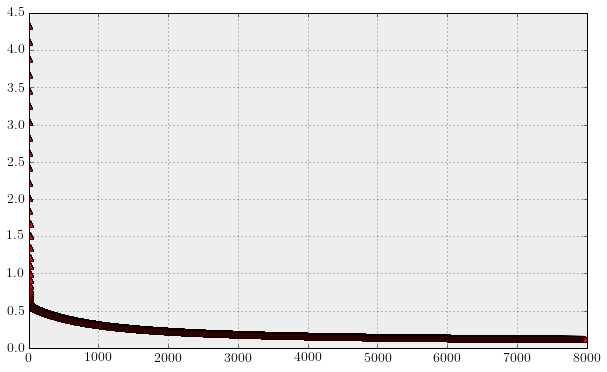

In [27]:
%pdb off
lrclass=LogisticRegression(.001,0.01,8000,False)
lrclass.train(X[:,feat],Y)

(10000L, 3L)
[0 1]


(2.0, 4.4000000000000004)

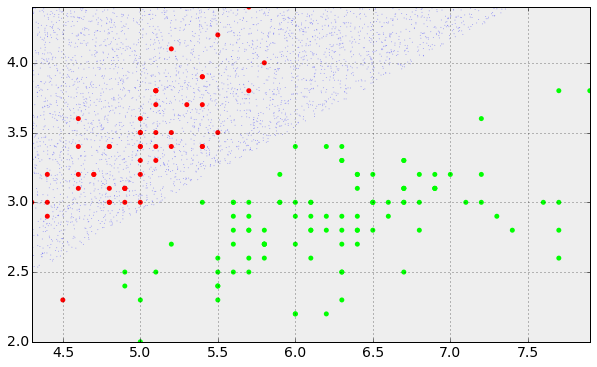

In [100]:
npts=10000
model=lrclass
ax=plt.gca()
x0spr = max(X[:,0])-min(X[:,0])
x1spr = max(X[:,1])-min(X[:,1])

tx=np.random.rand(npts,2)
tx[:,0] = tx[:,0]*x0spr + min(X[:,0])
tx[:,1] = tx[:,1]*x1spr + min(X[:,1])

tx=np.hstack((tx,np.ones((tx.shape[0],1))))

print tx.shape
cs= model.predict(tx)
cs=np.asarray(cs)
print  np.unique(cs)
ax.scatter(tx[:,0],tx[:,1],cs.ravel(), alpha=.35)

ax.hold(True)
ax.scatter(X[:,0],X[:,1],
              c=list(map(lambda x:'r' if x==1 else 'lime',Y)), 
              linewidth=0,s=25,alpha=1)
ax.set_xlim([min(X[:,0]), max(X[:,0])])
ax.set_ylim([min(X[:,1]), max(X[:,1])])

4.3 7.9 [ 2.49215493] [ 4.70099749]


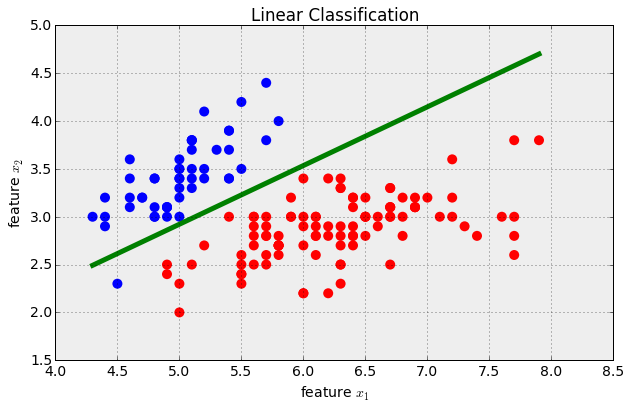

In [101]:
#Lets plot the decision boundary...
plt.scatter(X[Y.ravel()==0,0],X[Y.ravel()==0,1], c='r', s=100)
plt.scatter(X[Y.ravel()==1,0],X[Y.ravel()==1,1], c='b', s=100)

minx=min(X[:,0])
maxx=max(X[:,0])

y1=(-lrclass.theta[2]-lrclass.theta[0]*minx)/lrclass.theta[1]
y2=(-lrclass.theta[2]-lrclass.theta[0]*maxx)/lrclass.theta[1]
print minx,maxx, y1, y2
plt.plot([minx,maxx],[y1,y2], c='g', linewidth=5.0)

plt.title("Linear Classification")
plt.xlabel("feature $x_1$")
plt.ylabel("feature $x_2$")

fig_ml_in_10 = plt.gcf()
plt.savefig('linear-class-svm-class.svg',format='svg')

In [102]:
feat=[0,1,4]
lrclass=LogisticRegression(0.01,0.01,4000,False)#SVM(2.5,0.005,2000,False)

In [103]:
def print_confusion_matrix(plabels,tlabels):
    import pandas as pd
    plabels = pd.Series(plabels)
    tlabels = pd.Series(tlabels)
    
    # draw a cross tabulation...
    df_confusion = pd.crosstab(tlabels,plabels, rownames=['Actual'], colnames=['Predicted'], margins=True)
    
    #print df_confusion
    return df_confusion

In [104]:
# see the documentation of split_data in tools for further information...
Xtrain,Ytrain,Xtest,Ytest=t.split_data(X,Y.ravel())
Ytrain=Ytrain.reshape(len(Ytrain),1)
Ytest=Ytest.reshape(len(Ytest),1)
print " Training Data Set Dimensions=", Xtrain.shape, "Training True Class labels dimensions", Ytrain.shape   
print " Test Data Set Dimensions=", Xtest.shape, "Test True Class labels dimensions", Ytest.shape   


 Training Data Set Dimensions= (104L, 5L) Training True Class labels dimensions (104L, 1L)
 Test Data Set Dimensions= (45L, 5L) Test True Class labels dimensions (45L, 1L)


In [105]:
lrclass.train(Xtrain,Ytrain) # your cost function at the minimum must be zero...

Converged, iterations:  1675 !!!
Value of Cost Function (obtained in 1676 iterations) at Minimum Points [[ 0.07142764]
 [ 1.17475316]
 [-1.58559938]
 [-0.66915753]
 [ 0.85865822]], is 0.067816318746


Automatic pdb calling has been turned OFF
Value of Cost Function at Minimum Points [[-0.05369214]
 [ 0.61979923]
 [-0.79313636]
 [-0.62195154]
 [ 0.76942665]], is 0.144421898646


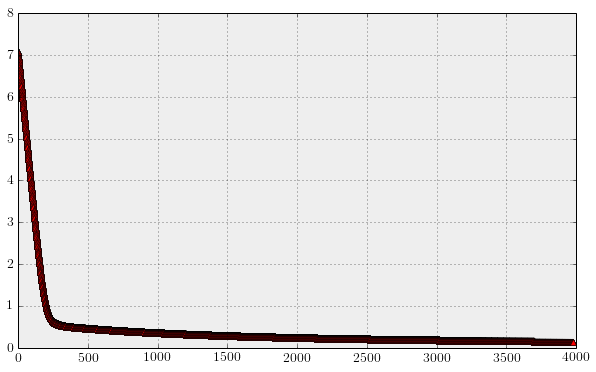

In [39]:
%pdb
lrclass.train(Xtrain,Ytrain) # your cost function at the minimum must be zero...

In [106]:
pclasses=lrclass.predict(Xtest)

In [107]:
#Lets see how good we are doing, by finding the accuracy on the test set..
print np.sum(pclasses==np.concatenate(Ytest))
print "Accuracy = ", np.sum(pclasses==np.concatenate(Ytest))/float(Ytest.shape[0])

45
Accuracy =  1.0


In [108]:
print_confusion_matrix(np.asarray(pclasses).ravel(),Ytest.ravel())

Predicted,0,1,All
Actual,,,
0.0,30,0,30
1.0,0,15,15
All,30,15,45
